<p align="center">
  <a href="https://imc.uc.cl" target="_blank">
    <img src=attachment:ad91936b-ffaa-4d78-8fca-1b445a35e3cd.jpg alt="IMC" width="220">
  </a>
</p>

# IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Interrogación 2</center></h1>

## Instrucciones

* Esta parte de la Interrogación debe ser desarrollada completamente en lenguaje de programación Python en este Notebook de Jupyter.

* El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados, y siguiendo buenas prácticas de programación. <br>
* La entrega de la interrogación se realizará a través de Canvas en la actividad `I2 Desarrollo`.
* Esta Interrogación debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
* Está **estrictamente prohibido comunicarse con sus compañeros de curso, terceras personas o uso de IA** durante el desarrollo de esta interrogación.
* Puede consultar los apuntes del curso y soluciones disponibles en el repositorio del ramo.
* Habrá sólo dos instancias para hacer preguntas, una al inicio de la prueba y otra a los 30 minutos de avance.<br>


* Ud. dispone de 1 hora para desarrollar esta interrogación.
* Recuerde **guardar frecuentemente sus avances** para evitar pérdidas de trabajo o problemas de envío.<br>
---

## Parte 2: Trabajo de Desarrollo (60 min)

Esta parte de la Interrogación es un trabajo práctico con datos. En esta parte, cada pregunta debe ser respondida desarrollando un código por usted que le permita entregar una respuesta.

En esta sección, estaremos trabajando con dos bases de datos. En primer lugar, usaremos los registros de la Organización Mundial de la Salud (OMS) de las espectativas de vida en distintos países a través de los años (Disponible desde la [página web de la OMS](https://www.who.int/data/gho/data/indicators/indicator-details/GHO/life-expectancy-at-birth-(years))) En segundo lugar, utilizaremos los datos de producto interno bruto (PIB) de distintos países (Disponible desde [Kaggle](https://www.kaggle.com/datasets/codebynadiia/gdp-per-country-20202025)).

Nuestro objetivo será explorar y analizar el comportamiento de estos datos, comprendiendo la relación entre estas dos variables, para finalmente entrenar modelos de regresión y evaluar su desempeño.

## 1. Lectura, limpieza y transformación (20 pts)

### 1.1 Lectura e inspección inicial (5 pts)
Usted dispone de los siguientes archivos:
* `pib2020-2025.csv`: contiene información del PIB en mil millones de USD de varios países entre los años 2020 y 2025.
* `WHO_life_expectancy.csv`: dataset de la OMS que contiene información sobre la espectativa de vida en varios países y años.

Para comenzar, cargue los dos archivos en dos dataframes separados llamados `pib_df`y `life_df`, respectivamente. Para cada uno, imprima la cantidad de filas que tiene, las columnas y sus tipos, y las primeras 5 filas.

In [134]:
# agregue las librerías que crea necesarios. Acá dejamos algunas estánadar que podrían ser de ayuda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# respuestas
pib_df = pd.read_csv("data_2025/pib2020-2025.csv")
life_df = pd.read_csv("data_2025/WHO_life_expectancy.csv")

print("pib_df:", pib_df.shape); print(pib_df.dtypes); display(pib_df.head())
print("life_df:", life_df.shape); print(life_df.dtypes); display(life_df.head())



pib_df: (196, 7)
Country     object
2020         int64
2021       float64
2022       float64
2023       float64
2024       float64
2025       float64
dtype: object


,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521,84375.0,142442.0,109764.0,115946.0,113343.0


life_df: (24420, 12)
IndicatorCode          object
Indicator              object
ParentLocationCode     object
ParentLocation         object
Location type          object
SpatialDimValueCode    object
Location               object
Period type            object
Period                  int64
Dim1 type              object
Dim1                   object
Value                  object
dtype: object


,IndicatorCode,Indicator,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,Dim1 type,Dim1,Value
0,WHOSIS_000001,Life expectancy at birth (years),AFR,Africa,Country,LSO,Lesotho,Year,2021,Sex,Male,48.7 [47.8-49.7]
1,WHOSIS_000001,Life expectancy at birth (years),AFR,Africa,Country,CAF,Central African Republic,Year,2021,Sex,Male,49.6 [48.5-50.9]
2,WHOSIS_000001,Life expectancy at birth (years),AFR,Africa,Country,LSO,Lesotho,Year,2021,Sex,Both sexes,51.5 [50.5-52.6]
3,WHOSIS_000001,Life expectancy at birth (years),AFR,Africa,Country,SWZ,Eswatini,Year,2021,Sex,Male,51.6 [50.7-52.8]
4,WHOSIS_000001,Life expectancy at birth (years),EMR,Eastern Mediterranean,Country,SOM,Somalia,Year,2021,Sex,Male,51.7 [50.6-53.1]


### 1.2 Limpieza de datos PIB (5 pts)

* Asegúrese de que su DataFrame `pib_df` no contenga valores nulos.
* Identifique si hay datos duplicados y elimínelos.
* Corrija los tipos de las columnas según corresponda, siempre justificando sus decisiones.

In [136]:
# respuestas
pib_df.isnull().sum()

Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64

In [137]:
pib_df = pib_df.dropna()

In [138]:
pib_df.isnull().sum()

Country    0
2020       0
2021       0
2022       0
2023       0
2024       0
2025       0
dtype: int64

In [139]:
pib_df = pib_df.drop_duplicates()

In [140]:
pib_df.describe()

,2020,2021,2022,2023,2024,2025
count,1.890000e+02,1.890000e+02,1.890000e+02,1.890000e+02,1.890000e+02,1.890000e+02
mean,4.514222e+05,5.151044e+05,5.367216e+05,5.605903e+05,5.821778e+05,5.991414e+05
std,1.977386e+06,2.249103e+06,2.377764e+06,2.484240e+06,2.593048e+06,2.693421e+06
min,5.200000e+01,6.200000e+01,6.100000e+01,6.300000e+01,6.500000e+01,6.500000e+01
25%,8.628000e+03,9.484000e+03,1.253100e+04,1.240200e+04,1.337000e+04,1.421400e+04
50%,3.543200e+04,3.820900e+04,4.195300e+04,4.395800e+04,4.694300e+04,4.782900e+04
75%,2.105410e+05,2.562260e+05,2.804740e+05,2.897810e+05,2.890700e+05,3.032930e+05
max,2.135412e+07,2.368118e+07,2.600690e+07,2.772072e+07,2.918490e+07,3.050722e+07


No se cambiaron los tipos de las columnas ya que me parecion correctos y adecuados para realizar un analisis en ellos

### 1.3 Filtrar datos de `life_df` (5 pts)

Esta vez, solo usaremos los valores de **espectativa de vida al nacer** para cada país según sexo.
Inspeccione su DataFrame y realice los siguientes pasos:

1. Elimine todas las filas que no correspondan a espectativas de vida al nacer.
2. Elimine todas las columnas que considere innecesarias. Justifique su elección.

In [141]:
life_df.columns

Index(['IndicatorCode', 'Indicator', 'ParentLocationCode', 'ParentLocation',
       'Location type', 'SpatialDimValueCode', 'Location', 'Period type',
       'Period', 'Dim1 type', 'Dim1', 'Value'],
      dtype='object')

Se tomaron las siguientes columnas ya que son las requeridas por el enunciado siendo estas: 
- Location = Pais
- Dim1 = sexo
- Values = valores pedidos
- Indicator = el indicador de espectativa de vida al nacer
- Period 

In [154]:
# respuestas
life_df = life_df[life_df['Indicator'].str.contains("life expectancy at birth", case=False, na=False)]

cols_buenas = ['Location','Dim1', 'Value', 'Indicator', 'Period']  # ajusta según tu df
life_df = life_df[cols_buenas]

life_df.head()



,Location,Dim1,Value,Indicator,Period
0,Lesotho,Male,48.7,Life expectancy at birth (years),2021
1,Central African Republic,Male,49.6,Life expectancy at birth (years),2021
2,Lesotho,Both sexes,51.5,Life expectancy at birth (years),2021
3,Eswatini,Male,51.6,Life expectancy at birth (years),2021
4,Somalia,Male,51.7,Life expectancy at birth (years),2021


### 1.4 Transformar valores de `life_df` (5 pts)

Podrá haber notado que la columna `Value` es un string de formato `n1 [n2-n3]`, donde `n1` es el valor promedio de la variable, mientras que `n2`y `n3` son los límites inferior y superior de la variable. Para nuestro análisis, solo nos interesa el valor promedio.

* Transforme la columna `Value` para que solo contenga el valor promedio (`n1`). Asegúrese de que el tipo de columna sea siempre el correcto.
* Imprima los estadísticos principales de esta columna (promedio, desviación estándar, mínimo y máximo, etc)


In [ ]:
# respuestas


life_df['Value'] = life_df['Value'].str.split(' ').str[0].astype(float)


0    48.7
1    49.6
2    51.5
3    51.6
4    51.7
Name: Value, dtype: float64

In [153]:
life_df.head()

,Location,Dim1,Value,Indicator,Period
0,Lesotho,Male,48.7,Life expectancy at birth (years),2021
1,Central African Republic,Male,49.6,Life expectancy at birth (years),2021
2,Lesotho,Both sexes,51.5,Life expectancy at birth (years),2021
3,Eswatini,Male,51.6,Life expectancy at birth (years),2021
4,Somalia,Male,51.7,Life expectancy at birth (years),2021


In [ ]:
life_df['Value'].describe()



count    12210.000000
mean        70.174914
std          8.899653
min         36.600000
25%         64.200000
50%         71.900000
75%         77.100000
max         87.400000
Name: Value, dtype: float64

## 2. EDA univariado (27 pts)

Procederemos a explorar los datos contenidos dentro de `pib_df` y `life_df` por separado. Responda las siguientes preguntas, apoyándose de un gráfico cuando se le indique. No olvide colocar un título claro y etiquetas a los ejes de sus gráficos.

### 2.1 Valores del PIB (12 pts)

* ¿Entre qué magnitudes de valores se mueve el PIB de los países del mundo desde el año 2020 hasta 2025?
* ¿Cuáles son los 3 países con mayor PIB en 2025?
* ¿Cuáles son los 3 países con menor PIB en 2021?
* Seleccione un año de los disponibles y realice un histograma de los valores del PIB para ese año. ¿Cómo se distribuye esta variable? Comente.

In [ ]:
# respuestas

year_cols = ['2020', '2021', '2022', '2023', '2024', '2025']
for col in year_cols:
    pib_df[col] = pd.to_numeric(pib_df[col], errors='coerce')

# ========================================
# Pregunta 1: ¿Entre qué magnitudes se mueve el PIB desde 2020 a 2025?
# ========================================
print("=== PREGUNTA 1: Rango de magnitudes del PIB ===")
print(f"Mínimo PIB en todo el período: ${pib_df[year_cols].min().min():.2f} mil millones USD")
print(f"Máximo PIB en todo el período: ${pib_df[year_cols].max().max():.2f} mil millones USD")
print(f"Rango: ${pib_df[year_cols].min().min():.2f} a ${pib_df[year_cols].max().max():.2f} mil millones USD")








=== PREGUNTA 1: Rango de magnitudes del PIB ===
Mínimo PIB en todo el período: $52.00 mil millones USD
Máximo PIB en todo el período: $30507217.00 mil millones USD
Rango: $52.00 a $30507217.00 mil millones USD


In [176]:

top_3_2025 = pib_df.nlargest(3, '2025')[['Country', '2025']]
print(top_3_2025.to_string(index=False))

      Country       2025
United States 30507217.0
        China 19231705.0
      Germany  4744804.0


Esos son los paises con mayor PIB en 2025

In [175]:

bottom_3_2021 = pib_df.nsmallest(3, '2021')[['Country', '2021']]
print(bottom_3_2021.to_string(index=False))

Country  2021
 Tuvalu  62.0
  Nauru 176.0
  Palau 236.0


esos son los 3 paises con menor PIB en 2021

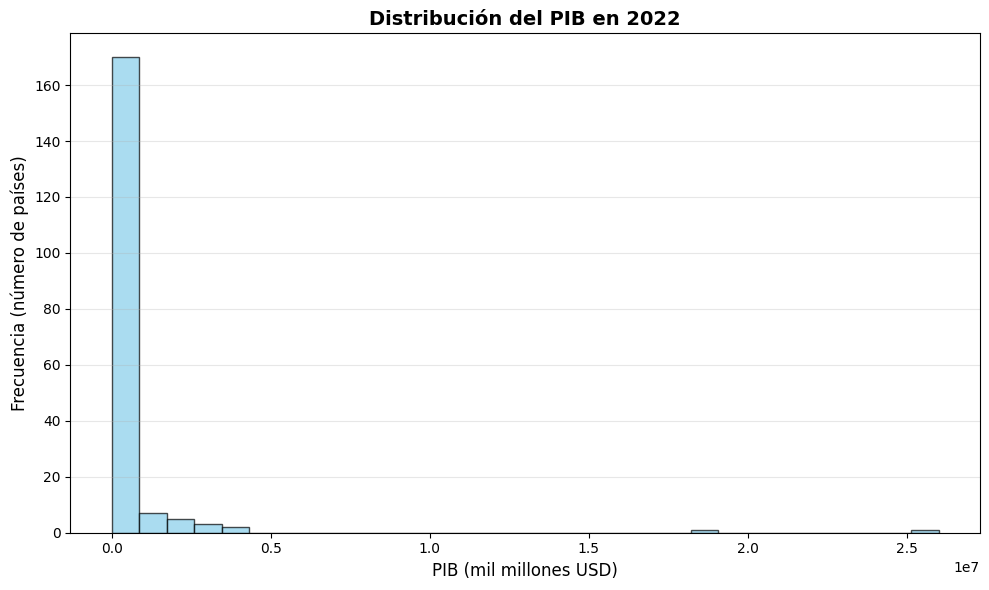

In [174]:

year_selected = '2022'
pib_values = pib_df[year_selected].dropna()

plt.figure(figsize=(10, 6))
plt.hist(pib_values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f'Distribución del PIB en {year_selected}', fontsize=14, fontweight='bold')
plt.xlabel('PIB (mil millones USD)', fontsize=12)
plt.ylabel('Frecuencia (número de países)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [178]:

# Comentario sobre la distribución
print(f"\nEstadísticos del PIB en {year_selected}:")
print(pib_values.describe())
print(f"\nInterpretación:")
print(f"- Media: ${pib_values.mean():.2f} mil millones USD")
print(f"- Mediana: ${pib_values.median():.2f} mil millones USD")




Estadísticos del PIB en 2022:
count    1.890000e+02
mean     5.367216e+05
std      2.377764e+06
min      6.100000e+01
25%      1.253100e+04
50%      4.195300e+04
75%      2.804740e+05
max      2.600690e+07
Name: 2022, dtype: float64

Interpretación:
- Media: $536721.63 mil millones USD
- Mediana: $41953.00 mil millones USD


La distribucion esta sesgada a la derecha(hay pocos paises con PIB alto)

Respuestas:

### 2.2 Esperanzas de vida (15 pts)

* ¿Cuántos países distintos hay representados dentro de `life_df`?
* ¿Cuál es el rango de años que contiene el dataset? ¿Cuáles de estos coinciden con los años que tenemos en `pib_df`?
* El dataset de la OMS le asigna un `ParentLocation` a cada país. Imprima todos los posibles valores y cuántas veces se repiten en su dataset `life_df`. ¿Cómo interpreta estas cantidades?
* Realice un boxplot que muestre la esperanza de vida según sexo y continente (o sector `ParentLocation`). Puede realizar uno o dos gráficos. Realice esta visualización solamente con los datos de 2021.

In [181]:
# respuestas

num_paises = life_df['Location'].nunique()
print(f"Número de países distintos: {num_paises}")
print(f"\nPrimeros 10 países:")
print(life_df['Location'].unique()[:10])

# ========================================
# Pregunta 2: Rango de años y coincidencias con pib_df
# ========================================


# ========================================
# Pregunta 3: ParentLocation - valores y frecuencias
# ========================================


# ========================================
# Pregunta 4: Boxplot de esperanza de vida por sexo y ParentLocation (2021)
# ========================================
print("\n=== PREGUNTA 4: Boxplot esperanza de vida 2021 ===")

# Filtrar solo datos de 2021
life_2021 = life_df[life_df['Period'] == 2021].copy()

print(f"Registros en 2021: {len(life_2021)}")
print(f"Sexos disponibles: {life_2021['Dim1'].unique()}")
print(f"Regiones en 2021: {life_2021['ParentLocation'].unique()}")

# Crear figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot 1: Por sexo
sns.boxplot(data=life_2021, x='Dim1', y='Value', ax=axes[0], palette='Set2')
axes[0].set_title('Esperanza de vida por Sexo (2021)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sexo', fontsize=12)
axes[0].set_ylabel('Esperanza de vida (años)', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Boxplot 2: Por ParentLocation (continente/región)
sns.boxplot(data=life_2021, x='ParentLocation', y='Value', ax=axes[1], palette='Set1')
axes[1].set_title('Esperanza de vida por Región (2021)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Región (ParentLocation)', fontsize=12)
axes[1].set_ylabel('Esperanza de vida (años)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Alternativa: Boxplot combinado (sexo y región juntos)
fig, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(data=life_2021, x='ParentLocation', y='Value', hue='Dim1', ax=ax, palette='husl')
ax.set_title('Esperanza de vida por Región y Sexo (2021)', fontsize=14, fontweight='bold')
ax.set_xlabel('Región (ParentLocation)', fontsize=12)
ax.set_ylabel('Esperanza de vida (años)', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Sexo', loc='best')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Estadísticos por grupo
print("\n=== Estadísticos por Sexo (2021) ===")
print(life_2021.groupby('Dim1')['Value'].describe())

print("\n=== Estadísticos por Región (2021) ===")
print(life_2021.groupby('ParentLocation')['Value'].describe())

Número de países distintos: 185

Primeros 10 países:
['Lesotho' 'Central African Republic' 'Eswatini' 'Somalia' 'Mozambique'
 'Guinea-Bissau' 'Zimbabwe' 'South Sudan' 'Namibia' 'Afghanistan']

=== PREGUNTA 4: Boxplot esperanza de vida 2021 ===
Registros en 2021: 555
Sexos disponibles: ['Male' 'Both sexes' 'Female']


KeyError: 'ParentLocation'

In [180]:

anos_life = sorted(life_df['Period'].unique())
print(f"Años en life_df: {anos_life}")
print(f"Rango: {min(anos_life)} a {max(anos_life)}")

# Años disponibles en pib_df
anos_pib = [2020, 2021, 2022, 2023, 2024, 2025]
print(f"\nAños en pib_df: {anos_pib}")

# Años que coinciden
anos_coinciden = [a for a in anos_life if a in anos_pib]
print(f"Años que coinciden: {anos_coinciden}")

Años en life_df: [np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021)]
Rango: 2000 a 2021

Años en pib_df: [2020, 2021, 2022, 2023, 2024, 2025]
Años que coinciden: [np.int64(2020), np.int64(2021)]


In [ ]:
print("\n=== PREGUNTA 3: ParentLocation (Continentes/Regiones) ===")

# Obtener los valores únicos de ParentLocation y sus conteos
parent_counts = life_df['ParentLocation'].value_counts()
print(f"\nValores únicos de ParentLocation y sus frecuencias:")
print(parent_counts)
print(f"\nTotal de regiones: {len(parent_counts)}")

# Interpretación
print(f"\nInterpretación:")
print(f"- Cada región (ParentLocation) agrupa varios países")
print(f"- La región con más registros: {parent_counts.index[0]} ({parent_counts.iloc[0]} registros)")
print(f"- La región con menos registros: {parent_counts.index[-1]} ({parent_counts.iloc[-1]} registros)")
print(f"- Esto refleja la cantidad de datos disponibles por región en la OMS")

Respuestas:

## 3. EDA multivariado (10 pts)

Ahora queremos entender la relación entre las variables del PIB y la esperanza de vida al nacer. Genere un único dataframe llamado `full_df` a partir de los dos datasets anteriores y responda las siguientes preguntas. De aquí en adelante, vamos a considerar **solamente** la esperanza de vida calculada para ambos sexos (Both sexes).

* ¿Cuál es la correlación entre el PIB de un país con la esperanza de vida al nacer? Calcule el valor para los años 2020 y 2021. ¿Qué nos indica este valor?

* Realice un scatterplot donde su eje X represente la esperanza de vida y su eje Y, el PIB. Comente lo que observa.

In [146]:
# respuestas

## 4. Transformación de escala (15 pts)

Ahora vamos a transformar la escala de nuestras variables para visualizar mejor la relación entre la espectativa de vida y PIB de los países.

* Genere las columnas `logPIB 2020` y `logPIB 2021`, donde el valor de cada columna corresponde al logaritmo en base 10 del PIB original. (Por ejemplo, si un valor de la columna `2020` es $x$, el valor correspondiente en la columna `logPIB 2020` debe ser $log_{10}(x)$

* Calcule nuevamente la correlación entre el PIB y la esperanza de vida al nacer para los dos años mencionados.

* Ahora, genere nuevamente un scatterplot entre la espectativa de vida promedio al nacer y su nueva representación del PIB para los años 2020 y 2021 por separado. ¿Puede ver alguna relación entre estas variables? Comente sus resultados.

In [147]:
# respuestas

## 5. Regresiones (28 pts)

Finalmente entrenaremos algunos modelos de regresión. Vamos a comparar el desempeño entre una regresión lineal y una **regresión logarítmica**, donde el valor a predecir ($y$), será calculado como:
$$ y = \beta_0 + \beta_1 \cdot log_{10}(X)$$

donde $X$ será nuestro PIB, $y$ corresponderá a la espectativa de vida al nacer y $\beta_0, \beta_1$ los coeficientes que calculará nuestro modelo.

En la práctica, vamos a partir realizando dos **regresión lineales**: la primera con la variable del PIB original y la segunda con nuestras nuevas columnas `logPIB` como nuestro $X$. 

En la siguiente sección, trabaje solamente con las esperanzas de vida de ambos sexos calculadas el año 2021.

In [148]:
# acá dejamos algunas librerías que pueden ser de utilidad, pero pueden agregar otras.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error as rmse
from sklearn.preprocessing import PolynomialFeatures

#### 5.1 Cree la matriz $X_1$ (PIB 2020 y 2021) y $X_2$ (log PIB 2020 y 2021), junto con el vector **y**. Luego separe cada uno en conjunto de entrenamiento y prueba con una división 70-30. (5 pts)
(Asigne explícitamente un valor a `random_state` para que su respuesta sea reproducible.)

In [149]:
# respuestas

#### 5.2 Entrene un modelo de regresión lineal para $X_1$. Imprima los coeficientes encontrados y calcule el RMSE y el $r^2$ para los conjuntos de entrenamiento y prueba. ¿Es una buena regresión? (10 pts)

In [150]:
# respuestas

Respuestas:

#### 5.3 Repita el proceso, esta vez para $X_2$. ¿Cómo se compara con la anterior? (6 pts)

In [151]:
# respuestas

Respuestas:

#### 5.4 Elija la variable con la que mejor desempeño obtuvo y entrene un modelo de regresión "polinomial" de grado 2, 3 y 4 con ella. Calcule nuevamente el RMSE y el $r^2$ para ambos conjuntos. ¿Mejoró su resultado? De todos los modelos, ¿cuál eligiría? (7 pts)

In [152]:
# respuestas

Respuestas: